## Feature_scaling:mandatory step in  machine learning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df=df.iloc[:,2:]
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


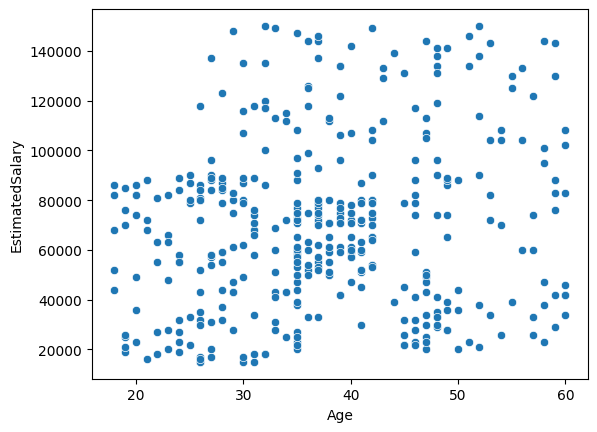

In [4]:
sns.scatterplot(x=df.iloc[:,0],y=df.iloc[:,1])
plt.show()

In [5]:
x=df.iloc[:,0:2]
y=df.iloc[:,-1]

In [6]:
x


,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [7]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [9]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [10]:
model = Sequential()
model.add(Dense(128,activation='relu',input_dim =2))
model.add(Dense(1,activation='sigmoid'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               384       
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [13]:
history =model.fit(x_train,y_train,validation_data=[x_test,y_test],epochs=100)

Epoch 1/100
10/10 [==============================] - 1s 29ms/step - loss: 964.0269 - accuracy: 0.4719 - val_loss: 819.6832 - val_accuracy: 0.6000
Epoch 2/100
10/10 [==============================] - 0s 6ms/step - loss: 298.6488 - accuracy: 0.4844 - val_loss: 32.3300 - val_accuracy: 0.6000
Epoch 3/100
10/10 [==============================] - 0s 7ms/step - loss: 62.9959 - accuracy: 0.5406 - val_loss: 1.4659 - val_accuracy: 0.3875
Epoch 4/100
10/10 [==============================] - 0s 8ms/step - loss: 38.7099 - accuracy: 0.4719 - val_loss: 54.9658 - val_accuracy: 0.4000
Epoch 5/100
10/10 [==============================] - 0s 7ms/step - loss: 71.2438 - accuracy: 0.5781 - val_loss: 110.9316 - val_accuracy: 0.4000
Epoch 6/100
10/10 [==============================] - 0s 16ms/step - loss: 68.1668 - accuracy: 0.4906 - val_loss: 39.7446 - val_accuracy: 0.6000
Epoch 7/100
10/10 [==============================] - 0s 16ms/step - loss: 43.3580 - accuracy: 0.5094 - val_loss: 67.4861 - val_accuracy: 

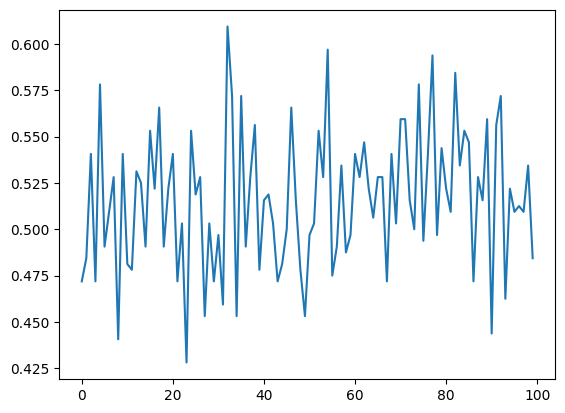

In [14]:
plt.plot(history.history['accuracy'])

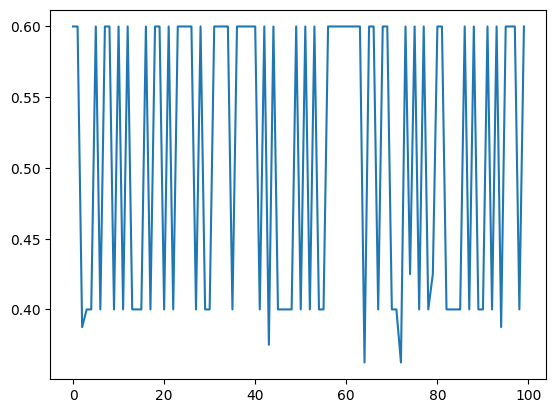

In [16]:
plt.plot(history.history['val_accuracy'])

In [17]:
# Applying Feature Scaling method

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaler = scaler.fit_transform(x_train)
x_test_scaler = scaler.fit_transform(x_test)

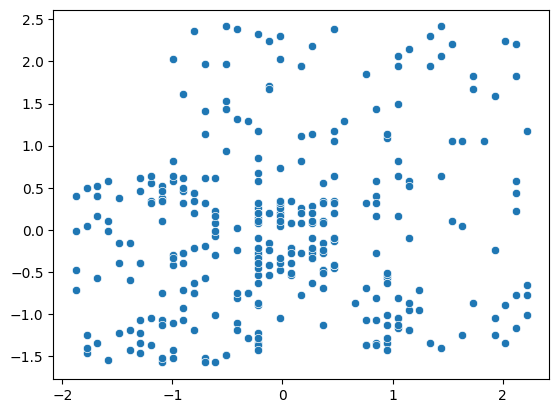

In [24]:
sns.scatterplot(x=x_train_scaler[:,0],y=x_train_scaler[:,1])
plt.show()

In [25]:
model1 = Sequential()
model1.add(Dense(128,activation='relu',input_dim =2))
model1.add(Dense(1,activation='sigmoid'))
model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history =model1.fit(x_train_scaler,y_train,validation_data=[x_test_scaler,y_test],epochs=100)

Epoch 1/100
10/10 [==============================] - 1s 25ms/step - loss: 0.6446 - accuracy: 0.6531 - val_loss: 0.6396 - val_accuracy: 0.6000
Epoch 2/100
10/10 [==============================] - 0s 6ms/step - loss: 0.5927 - accuracy: 0.6594 - val_loss: 0.5898 - val_accuracy: 0.6125
Epoch 3/100
10/10 [==============================] - 0s 7ms/step - loss: 0.5467 - accuracy: 0.6969 - val_loss: 0.5450 - val_accuracy: 0.7000
Epoch 4/100
10/10 [==============================] - 0s 8ms/step - loss: 0.5062 - accuracy: 0.7469 - val_loss: 0.5045 - val_accuracy: 0.7625
Epoch 5/100
10/10 [==============================] - 0s 6ms/step - loss: 0.4687 - accuracy: 0.7969 - val_loss: 0.4694 - val_accuracy: 0.7750
Epoch 6/100
10/10 [==============================] - 0s 7ms/step - loss: 0.4342 - accuracy: 0.8531 - val_loss: 0.4410 - val_accuracy: 0.8125
Epoch 7/100
10/10 [==============================] - 0s 8ms/step - loss: 0.4057 - accuracy: 0.8687 - val_loss: 0.4159 - val_accuracy: 0.8125
Epoch 8/100


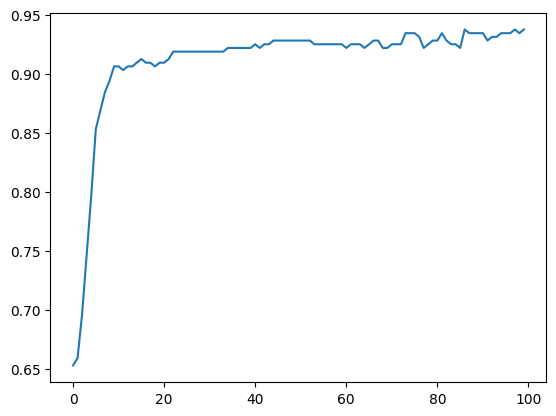

In [26]:
plt.plot(history.history['accuracy'])

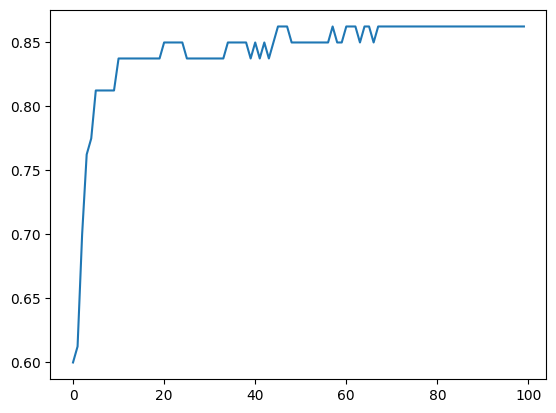

In [27]:
plt.plot(history.history['val_accuracy'])

In [28]:
# Drop_out

In [29]:
from tensorflow.keras.layers import Dropout

In [30]:
model2 = Sequential()
model2.add(Dense(128,activation='relu',input_dim =2))
model2.add(Dropout(0.5))
model2.add(Dense(128,activation='relu',input_dim =2))
model2.add(Dropout(0.4))
model2.add(Dense(1,activation='sigmoid'))
model2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history =model2.fit(x_train_scaler,y_train,validation_data=[x_test_scaler,y_test],epochs=100)

Epoch 1/100
10/10 [==============================] - 2s 28ms/step - loss: 0.6554 - accuracy: 0.6562 - val_loss: 0.5867 - val_accuracy: 0.8375
Epoch 2/100
10/10 [==============================] - 0s 8ms/step - loss: 0.5550 - accuracy: 0.8062 - val_loss: 0.4967 - val_accuracy: 0.8250
Epoch 3/100
10/10 [==============================] - 0s 8ms/step - loss: 0.4712 - accuracy: 0.8281 - val_loss: 0.4295 - val_accuracy: 0.8250
Epoch 4/100
10/10 [==============================] - 0s 7ms/step - loss: 0.4043 - accuracy: 0.8625 - val_loss: 0.3827 - val_accuracy: 0.8250
Epoch 5/100
10/10 [==============================] - 0s 7ms/step - loss: 0.3664 - accuracy: 0.8469 - val_loss: 0.3555 - val_accuracy: 0.8250
Epoch 6/100
10/10 [==============================] - 0s 9ms/step - loss: 0.3229 - accuracy: 0.8531 - val_loss: 0.3437 - val_accuracy: 0.8125
Epoch 7/100
10/10 [==============================] - 0s 8ms/step - loss: 0.3047 - accuracy: 0.8562 - val_loss: 0.3367 - val_accuracy: 0.8250
Epoch 8/100


# Regularization Techniques


L1 and L2 Regularization Techniques



In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import Adam

In [36]:
from sklearn.datasets import make_moons
from mlxtend.plotting import plot_decision_regions

In [37]:
x,y = make_moons(100,noise=0.25,random_state=2)

In [38]:
y

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0])

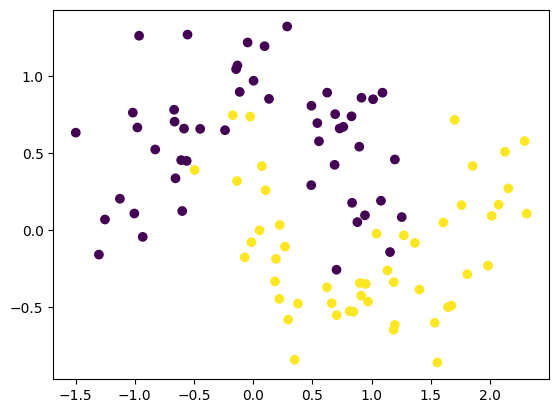

In [39]:
plt.scatter(x[:,0],x[:,1],c=y)

# Case1: Without Regularization

In [40]:
model = Sequential()
model.add(Dense(128,input_dim=2,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 128)               384       
                                                                 
 dense_8 (Dense)             (None, 128)               16512     
                                                                 
 dense_9 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17,025
Trainable params: 17,025
Non-trainable params: 0
_________________________________________________________________


In [41]:
adam=Adam(learning_rate=0.01)
model.compile(optimizer=adam,loss='binary_crossentropy',metrics=['accuracy'])


In [42]:
history =model.fit(x,y,validation_split=0.2,verbose=1,epochs=2000)

Epoch 1/2000
3/3 [==============================] - 1s 239ms/step - loss: 0.5977 - accuracy: 0.5875 - val_loss: 0.3478 - val_accuracy: 0.9000
Epoch 2/2000
3/3 [==============================] - 0s 44ms/step - loss: 0.4358 - accuracy: 0.8500 - val_loss: 0.2108 - val_accuracy: 0.9000
Epoch 3/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.3817 - accuracy: 0.8375 - val_loss: 0.1929 - val_accuracy: 0.8500
Epoch 4/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.3923 - accuracy: 0.8375 - val_loss: 0.2339 - val_accuracy: 0.9000
Epoch 5/2000
3/3 [==============================] - 0s 72ms/step - loss: 0.3664 - accuracy: 0.8500 - val_loss: 0.3454 - val_accuracy: 0.9000
Epoch 6/2000
3/3 [==============================] - 0s 44ms/step - loss: 0.3907 - accuracy: 0.8375 - val_loss: 0.2940 - val_accuracy: 0.9000
Epoch 7/2000
3/3 [==============================] - 0s 67ms/step - loss: 0.3460 - accuracy: 0.8500 - val_loss: 0.2058 - val_accuracy: 0.9000
Epoch 8/2000

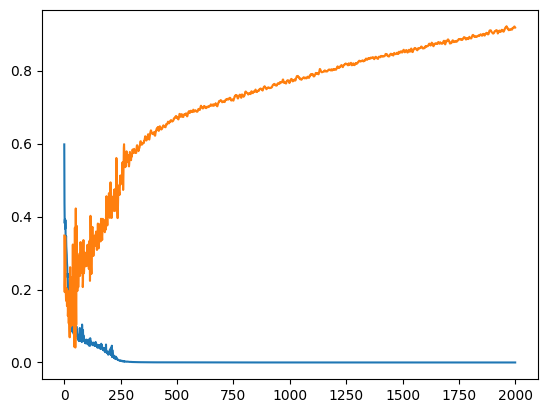

In [44]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

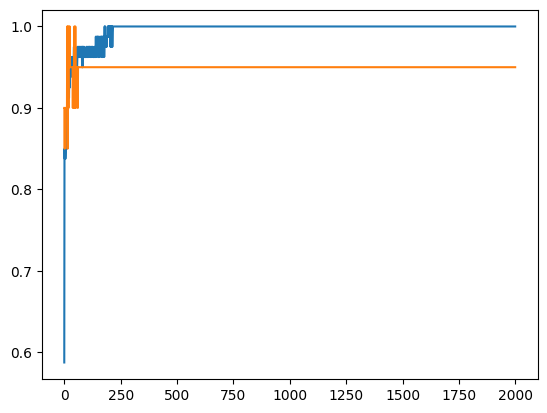

In [45]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

9600/9600 [==============================] - 17s 2ms/step


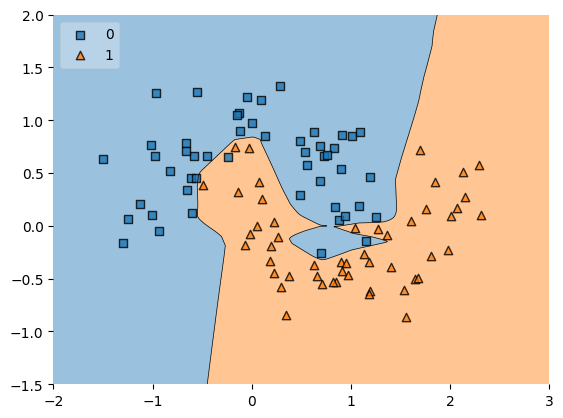

In [46]:
plot_decision_regions(x,y.astype('int'),clf=model,legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

# With Regularization Technique

In [48]:
model1 = Sequential()
model1.add(Dense(128,input_dim=2,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.03)))
model1.add(Dense(128,activation='relu'))
model1.add(Dense(1,activation='sigmoid'))
model1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 128)               384       
                                                                 
 dense_15 (Dense)            (None, 128)               16512     
                                                                 
 dense_16 (Dense)            (None, 1)                 129       
                                                                 
Total params: 17,025
Trainable params: 17,025
Non-trainable params: 0
_________________________________________________________________


In [49]:
adam=Adam(learning_rate=0.01)
model1.compile(optimizer=adam,loss='binary_crossentropy',metrics=['accuracy'])


In [50]:
history1 = model1.fit(x,y,validation_split=0.2,verbose=1,epochs=2000)

Epoch 1/2000
3/3 [==============================] - 1s 196ms/step - loss: 0.7010 - accuracy: 0.7125 - val_loss: 0.4607 - val_accuracy: 0.9000
Epoch 2/2000
3/3 [==============================] - 0s 31ms/step - loss: 0.5100 - accuracy: 0.8375 - val_loss: 0.3207 - val_accuracy: 0.9000
Epoch 3/2000
3/3 [==============================] - 0s 31ms/step - loss: 0.4438 - accuracy: 0.8500 - val_loss: 0.3185 - val_accuracy: 0.9000
Epoch 4/2000
3/3 [==============================] - 0s 39ms/step - loss: 0.4280 - accuracy: 0.8500 - val_loss: 0.3327 - val_accuracy: 0.9000
Epoch 5/2000
3/3 [==============================] - 0s 41ms/step - loss: 0.4364 - accuracy: 0.8250 - val_loss: 0.2953 - val_accuracy: 0.9000
Epoch 6/2000
3/3 [==============================] - 0s 41ms/step - loss: 0.3918 - accuracy: 0.8375 - val_loss: 0.3236 - val_accuracy: 0.9000
Epoch 7/2000
3/3 [==============================] - 0s 47ms/step - loss: 0.4038 - accuracy: 0.8375 - val_loss: 0.2383 - val_accuracy: 0.9000
Epoch 8/2000

9600/9600 [==============================] - 17s 2ms/step


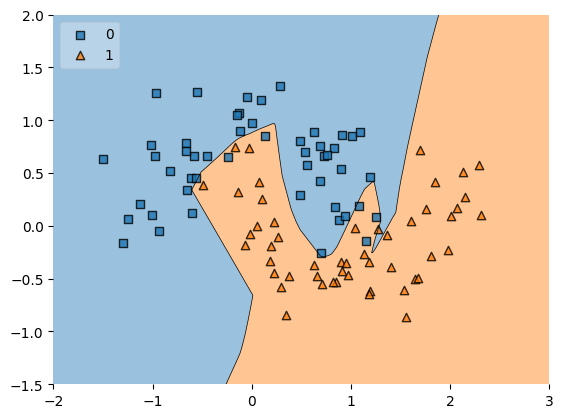

In [51]:
plot_decision_regions(x,y.astype('int'),clf=model1,legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

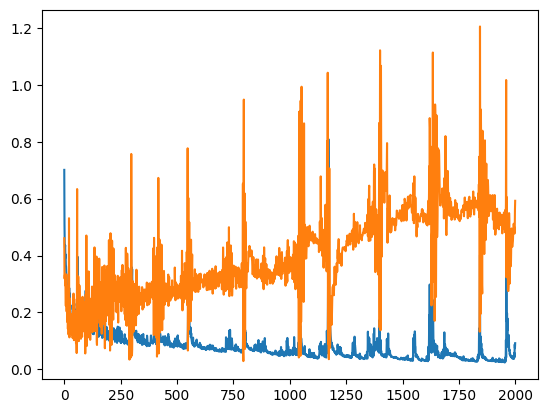

In [52]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

In [53]:
model_weights_layer1 =model.get_weights()[0].reshape(256)

In [54]:
model_weights_layer2 =model1.get_weights()[0].reshape(256)

<Axes: >

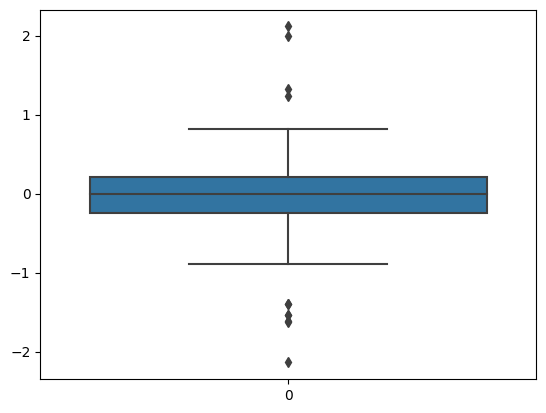

In [55]:
sns.boxplot(model_weights_layer1)

<Axes: >

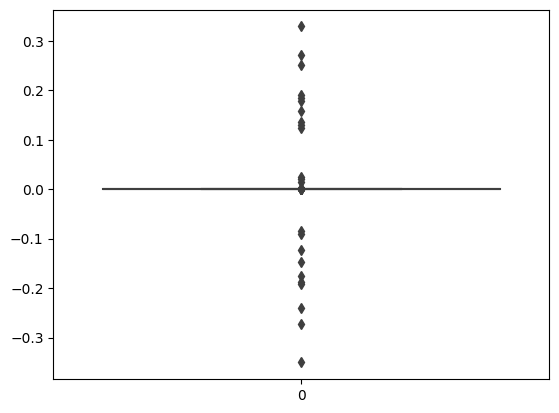

In [56]:
sns.boxplot(model_weights_layer2)

In [57]:
model_weights_layer1.min()

-2.1381388

In [58]:
model_weights_layer2.min()

-0.35019135

<ipython-input-61-3cd2c75ed3a7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model_weights_layer1)


<Axes: ylabel='Density'>

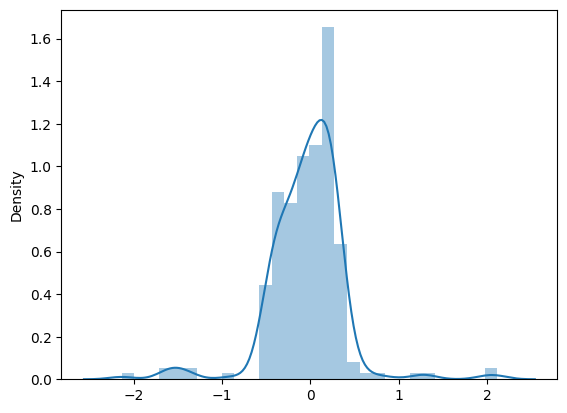

In [61]:
sns.distplot(model_weights_layer1)


<ipython-input-60-55003b2a9944>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model_weights_layer2)


<Axes: ylabel='Density'>

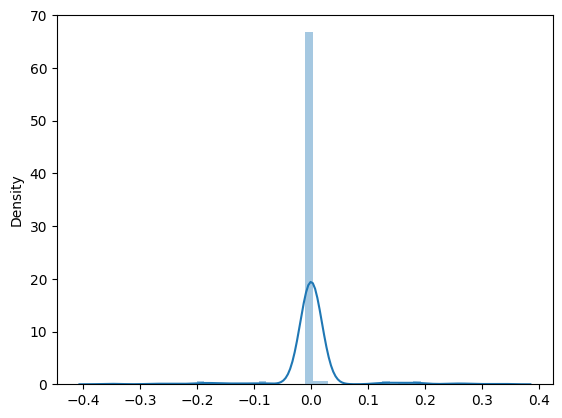

In [60]:
sns.distplot(model_weights_layer2)

Batch Normalization

In [62]:
from keras.layers import BatchNormalization

In [63]:
model2 = Sequential()
model2.add(Dense(128,input_dim=2,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.03)))
model2.add(Dense(128,activation='relu'))
model2.add(Dense(1,activation='sigmoid'))
adam=Adam(learning_rate=0.01)
model2.compile(optimizer=adam,loss='binary_crossentropy',metrics=['accuracy'])
history2= model2.fit(x,y,validation_split=0.2,verbose=1,epochs=2000)


Epoch 1/2000
3/3 [==============================] - 2s 198ms/step - loss: 0.7422 - accuracy: 0.6750 - val_loss: 0.4929 - val_accuracy: 0.9000
Epoch 2/2000
3/3 [==============================] - 0s 32ms/step - loss: 0.5308 - accuracy: 0.8125 - val_loss: 0.3427 - val_accuracy: 0.9000
Epoch 3/2000
3/3 [==============================] - 0s 38ms/step - loss: 0.4602 - accuracy: 0.8375 - val_loss: 0.2953 - val_accuracy: 0.9000
Epoch 4/2000
3/3 [==============================] - 0s 41ms/step - loss: 0.4358 - accuracy: 0.8500 - val_loss: 0.3130 - val_accuracy: 0.9000
Epoch 5/2000
3/3 [==============================] - 0s 41ms/step - loss: 0.4373 - accuracy: 0.8250 - val_loss: 0.3244 - val_accuracy: 0.9000
Epoch 6/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.4181 - accuracy: 0.8375 - val_loss: 0.3406 - val_accuracy: 0.9000
Epoch 7/2000
3/3 [==============================] - 0s 64ms/step - loss: 0.4192 - accuracy: 0.8500 - val_loss: 0.2288 - val_accuracy: 0.9000
Epoch 8/2000